<h1 align = "center">E-Commerce Analytics</h1>

<div style="background-color:#A2D2FF; padding:10px; border-radius:5px;">
    <h2 style="color:#011F4B;"> Sales Analytics  </h2>
    It is aimed to analyze sales and performance with e-commerce sales data.
</div>

<div style="background-color:#F5F5F5; padding:10px; border-radius:5px;">
    <h2 style="color:#011F4B;">Table of Contents</h2>
</div>


1. [Introduction](#1)
   * 1.1 [Purpose and objectives](#2)
   * 1.2 [Description of the dataset and its features](#3)
2. [Dataset Exploration](#4)
   * 2.1 [Loading the Dataset](#5)
   * 2.2 [Understanding the Dataset](#6)
   * 2.3 [Initial Analysis on the Dataset](#7)
3. [Exploratory Data Analysis (EDA)](#8)
   * 3.1 [Handling Missing Values](#9)
   * 3.2 [Removing Quantity with Negative Values](#10)
   * 3.3 [Data Formatting](#11)
4. [Feature Engineering](#12)
   * 4.1 [Creating new features](#13)
5. [Data Visualization](#14)
   * 5.1 [Revenue Trends Over Time](#15)
   * 5.2 [Top-Performing Products](#16)
   * 5.3 [Country-Level Revenue Distribution](#17)
   * 5.4 [Sales by Hour/Day](#18)
6. [Key Performance Indicators (KPIs)](#19)
   * 6.1 [Total Revenue](#20)
   * 6.2 [Monthly Revenue Growth](#21)
   * 6.3 [Best-Selling Products](#22)
   * 6.4 [Average Order Value (AOV)](#23)
   * 6.5 [Customer Lifetime Value (CLV)](#24)

Please feel free to share your thoughts and ideas to help improve this project as I continue to develop my approach. Thank you for your time and contributions!

<div style="background-color:#F5F5F5; padding:5px; border-radius:5px;">
    <h2 style="color:#011F4B;">Introduction</h2>
<a id = 1 ></a>
</div>

#### Purpose and Objectives <a id = 2 ></a>

The purpose of analyzing this e-commerce dataset is to gain insights into the sales trends, customer behavior, and product performance. By studying the transactional data, we aim to:

1. Identify Sales Trends: Analyze the revenue patterns over time to understand seasonality, peak sales periods, and fluctuations in demand.
2. Understand Customer Behavior: Explore customer purchasing habits, including their spending patterns, frequency of purchases, and geographical distribution.
3. Evaluate Product Performance: Determine the best-selling and most profitable products, identify underperforming items, and explore opportunities to optimize product offerings.
4. Uncover Regional Insights: Assess country-level sales to identify high-performing regions and potential areas for expansion.
5. Develop Key Performance Indicators (KPIs): Create metrics such as total revenue, average order value (AOV)..

#### Description of the dataset and its features <a id = 3 ></a>

The dataset is a collection of e-commerce transactions, providing detailed information about orders placed by customers. It includes the following features:
<div style="background-color:#A2D2FF; padding:10px; border-radius:5px;">
   


**InvoiceNo:** A unique identifier for each transaction. 

**StockCode:** A unique product code that identifies each item in the inventory. 

**Description:** A brief text description of the product. 

**Quantity:** The number of units purchased in each transaction. 

**InvoiceDate:** The date and time of the transaction. 

**UnitPrice:** The price of a single unit of the product. 

**CustomerID:** A unique identifier for each customer. 

**Country:** The country where the customer resides. 
</div>

This dataset provides a robust foundation for exploring key business questions and generating actionable insights, making it an excellent resource for data analysis and visualization projects.

<div style="background-color:#F5F5F5; padding:5px; border-radius:5px;">
    <h2 style="color:#011F4B;">Dataset Exploration</h2>
<a id = 4 ></a>
</div>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/commerceimage/3405349.jpg
/kaggle/input/ecommerce-data/data.csv


#### Loading the Dataset <a id = 5 ></a>

In [3]:
data = pd.read_csv("/kaggle/input/ecommerce-data/data.csv", encoding="ISO-8859-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


note: We have specified ISO-8859-1 because the character encoding of the dataset is not utf-8 and one character during the reading process is in a format that the decoder does not support.

#### Understanding the Dataset <a id = 6 ></a>

This dataset provides transaction-level information about product sales, customers, and geographic details.

**InvoiceNo:** Unique transaction ID. Tracks order patterns and transaction frequency.

**StockCode:** Product ID. Evaluates product popularity and inventory performance.

**Description:** Product name. Identifies best-selling or niche items.

**Quantity:** Units sold per transaction. Measures product demand.

**InvoiceDate:** Transaction timestamp. Analyzes trends and seasonality.

**UnitPrice:** Price per item. Assesses revenue and pricing strategies.

**CustomerID:** Unique customer ID. Enables customer segmentation and loyalty analysis.

**Country:** Customer’s country. Highlights geographic sales trends and opportunities.

**Potential Insights:**

1. Sales Trends: Analyze daily, weekly, or monthly sales performance.
2. Top Products: Identify best-selling and underperforming products.
3. Customer Segmentation: Group customers by purchase patterns or regions.
4. Revenue Analysis: Calculate total revenue, average order value, and profitability.
5. Market Insights: Understand regional demand and market potential.
6. Seasonal Patterns: Detect high-demand periods and optimize inventory accordingly.

#### Initial Analysis on the Dataset <a id = 7 ></a>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.shape

(541909, 8)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


*  Customer ID and Description contain missing values.
*  There are negative values in UnitPrice and Quantity because of cancelled orders.
*  Quantity and Unit Price should be multiplied in order to create Total Price.

<div style="background-color:#F5F5F5; padding:5px; border-radius:5px;">
    <h2 style="color:#011F4B;">Exploratory Data Analysis (EDA)</h2>
<a id = 8 ></a>
</div>

#### Handling Missing Values <a id = 9 ></a>

In [7]:
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

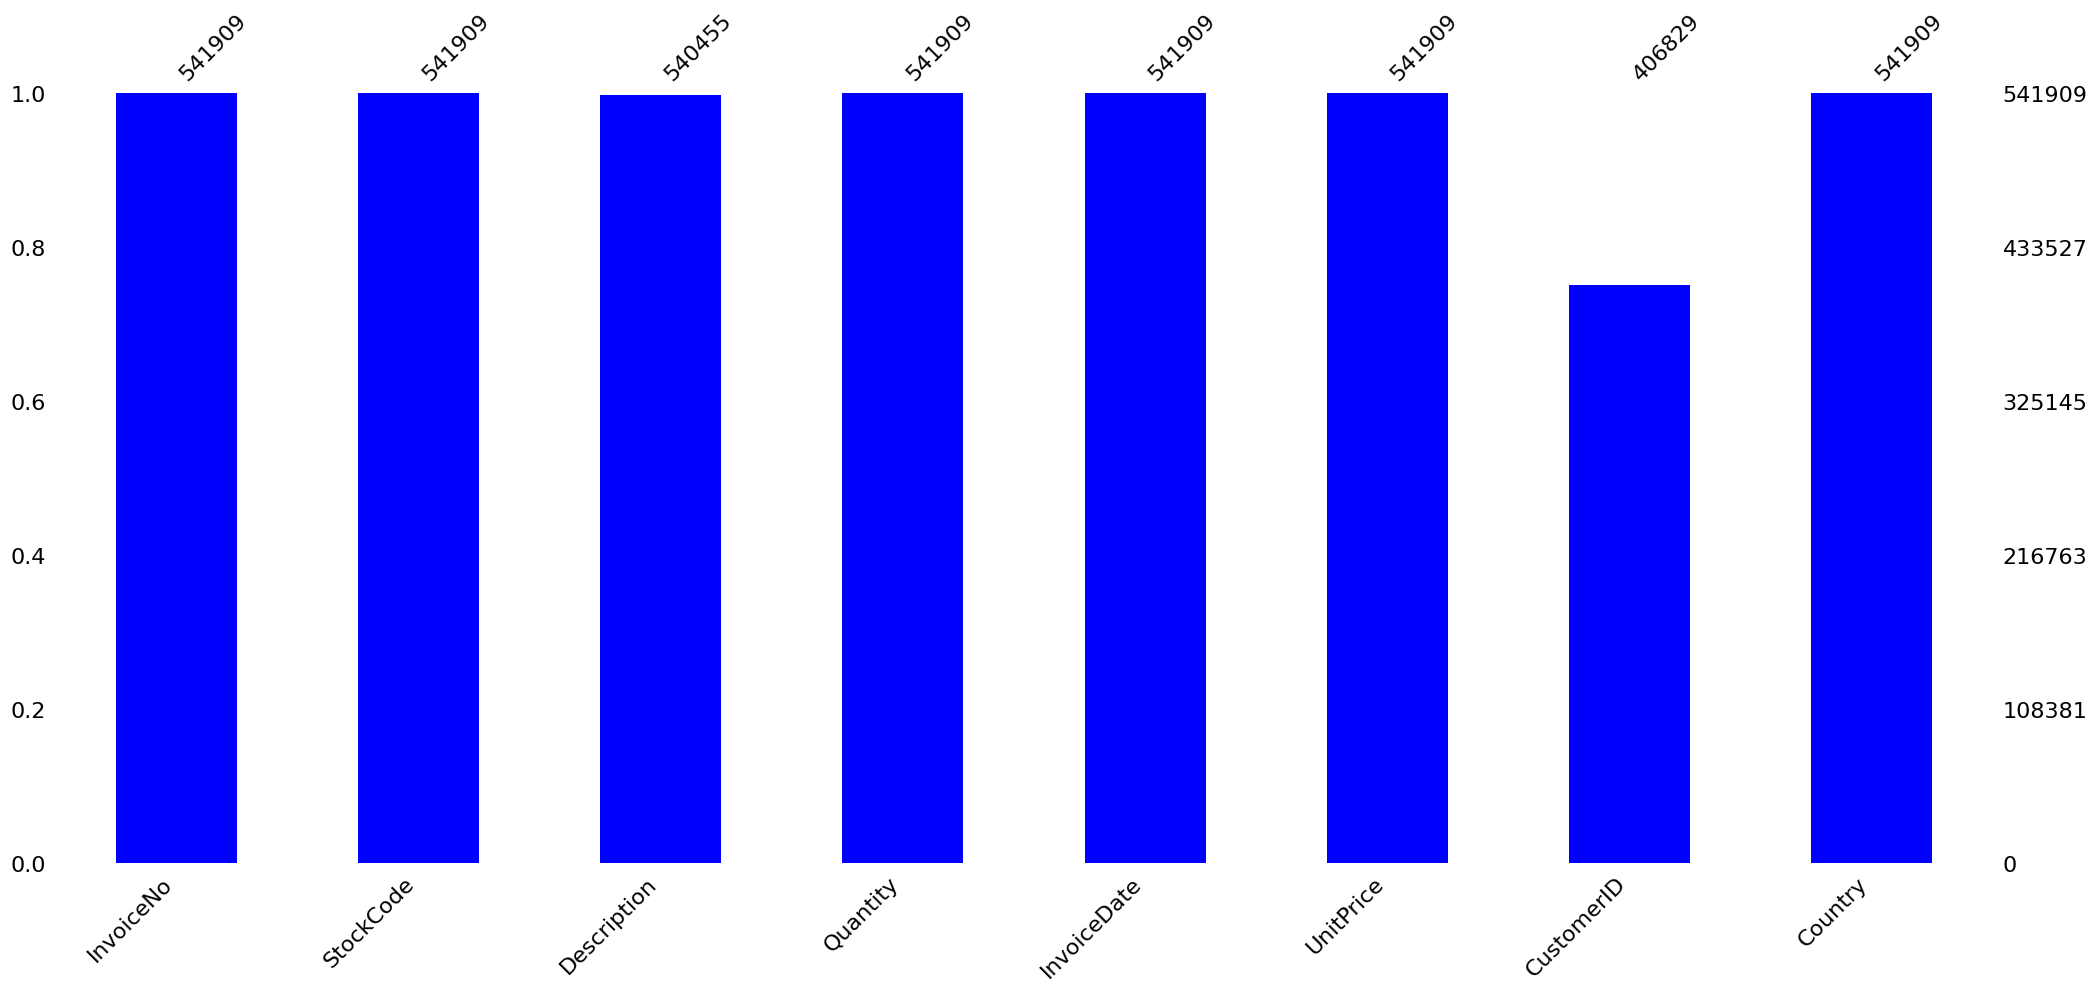

In [8]:
import missingno
missingno.bar(data, color = "b")
plt.show()

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


#### Removing Quantity with Negative Values <a id = 10 ></a>

Negative quantities often indicate errors such as returns, refunds, or cancellations. Keeping these could lead to inaccurate revenue, transaction volume, and customer behavior insights. So we filter out negative values.

In [12]:
data = data[data.Quantity > 0]

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


#### Data Formatting <a id = 11 ></a>

Data type conversion is a data formatting step. To achieve more successful results, we will convert data types into appropriate formats (for example, strings into dates, strings into integers, categorical data into numeric representations).

#### Changing the invoice_date format - String to Timestamp format

In [14]:
data["InvoiceDate"] = pd.to_datetime(data.InvoiceDate, format="%m/%d/%Y %H:%M")

#### Changing the description - UPPER case to LOWER case

In [15]:
data["Description"] = data.Description.str.lower()

#### Changing the customer_id - to int type 

In [16]:
data["CustomerID"] = data["CustomerID"].astype("int64")

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<div style="background-color:#F5F5F5; padding:5px; border-radius:5px;">
    <h2 style="color:#011F4B;">Feature Engineering</h2>
<a id = 12 ></a>
</div>

#### Creating New Features

* Revenue = Quantity x UnitPrice
* Order Date: Extract year, month, day, and hour from InvoiceDate
* Total Products Ordered: Aggregate total items purchased per transaction

**Revenue**

In [18]:
data["Revenue"] = data["Quantity"]*data["UnitPrice"]

**Order Date**

In [19]:
data["Year"] = data["InvoiceDate"].dt.year
data["Month"] = data["InvoiceDate"].dt.month
data["Day"] = data["InvoiceDate"].dt.day
data["Hour"] = data["InvoiceDate"].dt.hour

**Total Products Ordered**

In [20]:
total_products = data.groupby("InvoiceNo")["Quantity"].sum().reset_index()
total_products.rename(columns={"Quantity": "TotalProductsOrdered"}, inplace=True)

In [21]:
data = pd.merge(data, total_products, on="InvoiceNo", how="left")

In [22]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Hour,TotalProductsOrdered
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,8,40
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,40
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,8,40
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,40
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,8,40


<div style="background-color:#F5F5F5; padding:5px; border-radius:5px;">
    <h2 style="color:#011F4B;">Data Visualization</h2>
<a id = 14 ></a>
</div>

### Revenue Trends Over Time: Line Chart <a id = 15 ></a>

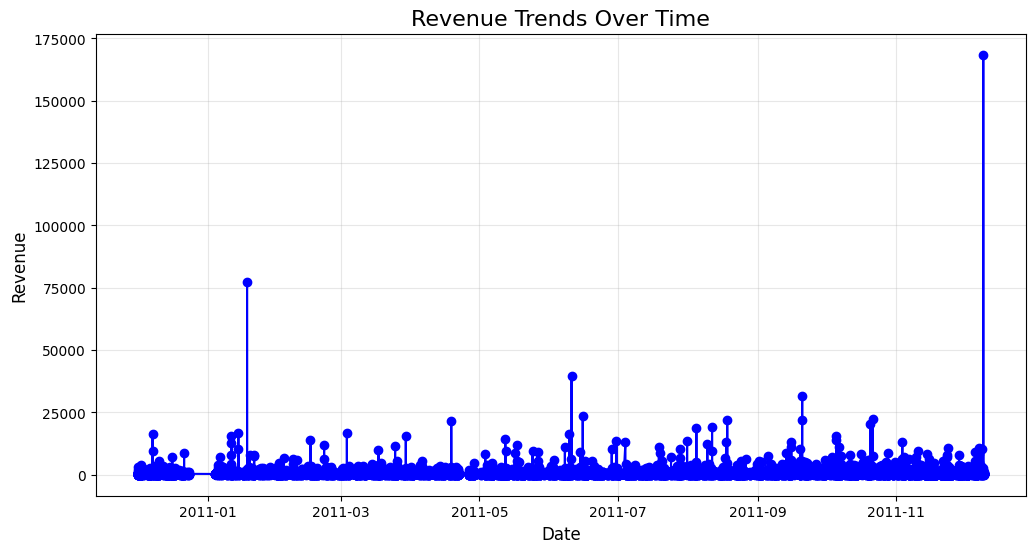

In [23]:
revenue_trends = data.groupby("InvoiceDate")["Revenue"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(revenue_trends["InvoiceDate"], revenue_trends["Revenue"], color="blue", marker="o")
plt.title("Revenue Trends Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

* The line chart can reveal seasonal patterns (e.g., higher revenue during holidays).
* It can highlight long-term trends, such as steady growth, decline, or stagnation in revenue over months or years.
* Sudden revenue drops or unexpected spikes can indicate issues such as stockouts, delivery delays, or data errors.

### Top-Performing Products: Bar Chart <a id = 16 ></a>

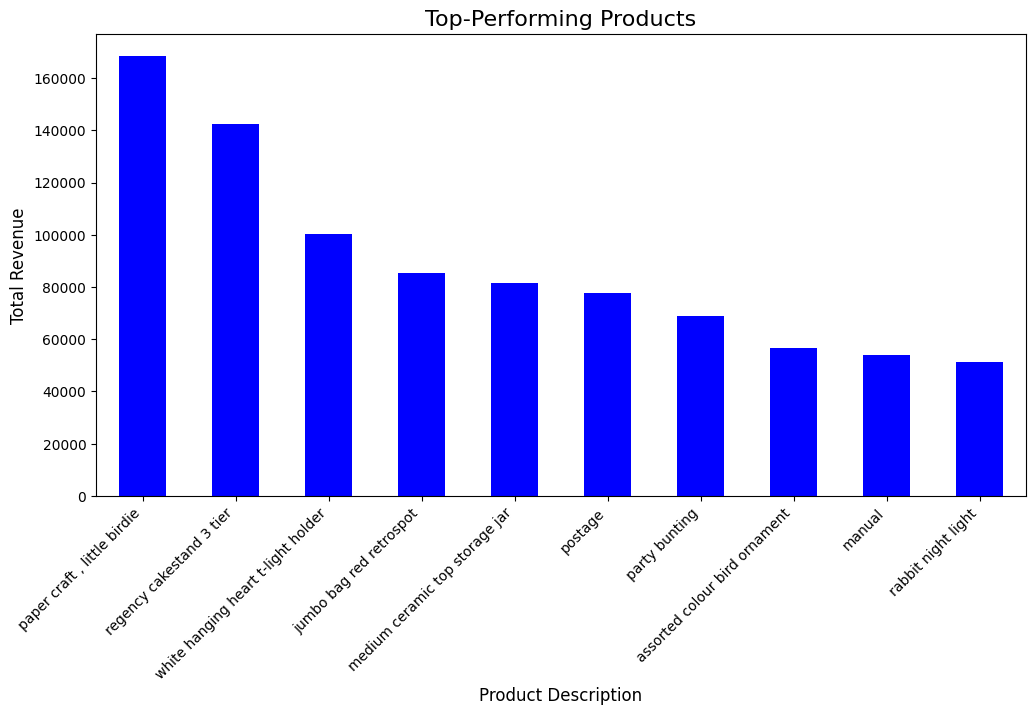

In [24]:
top_products = data.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="blue")
plt.title("Top-Performing Products", fontsize=16)
plt.xlabel("Product Description", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

* By identifying the highest revenue-generating products, the chart can help prioritize production, promotion and inventory planning.
* Paper Craft, Little Birdie is the most popular product, possibly due to its aesthetic appeal, seasonal demand or effective marketing. Consider increasing inventory and using it in promotional campaigns.
* We could highlight the same product in advertisements or bundle it with complementary products.

### Country-Level Revenue Distribution <a id = 17 ></a>

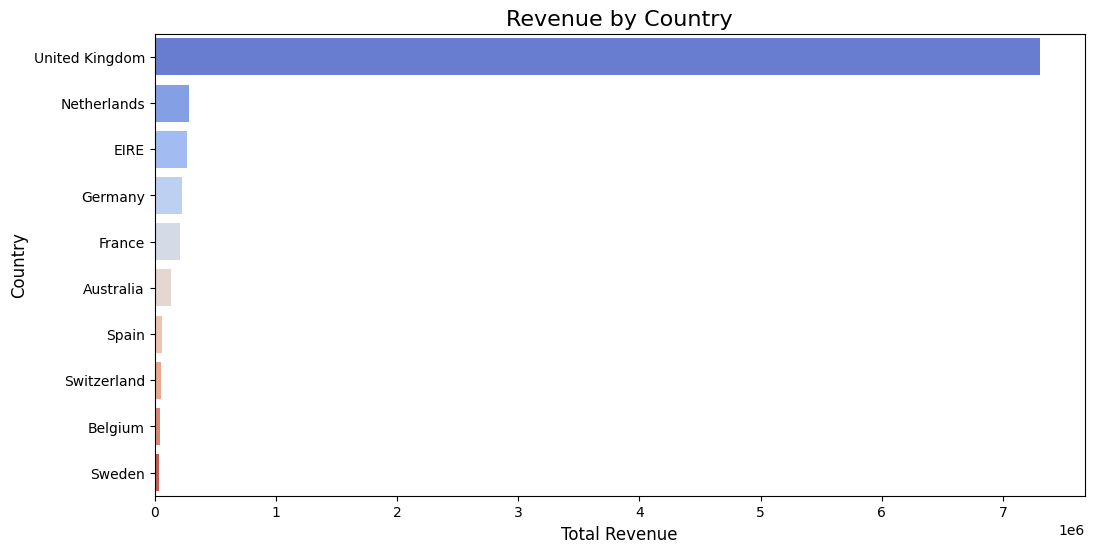

In [25]:
country_revenue = data.groupby("Country")["Revenue"].sum().sort_values(ascending=False)

top_countries = country_revenue.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Revenue by Country", fontsize=16)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()

* Let's understand the geographical market performance. It identifies where most of the revenue comes from and where there may be opportunities for growth.
* As the top revenue contributor, the UK is likely the business's core market. It may have the largest customer base, most established distribution networks, or the most targeted marketing campaigns.
Action needed: We can focus on maintaining strong customer relationships and optimizing logistics in this region.

### Sales by Hour/Day: Heatmap <a id = 18 ></a>

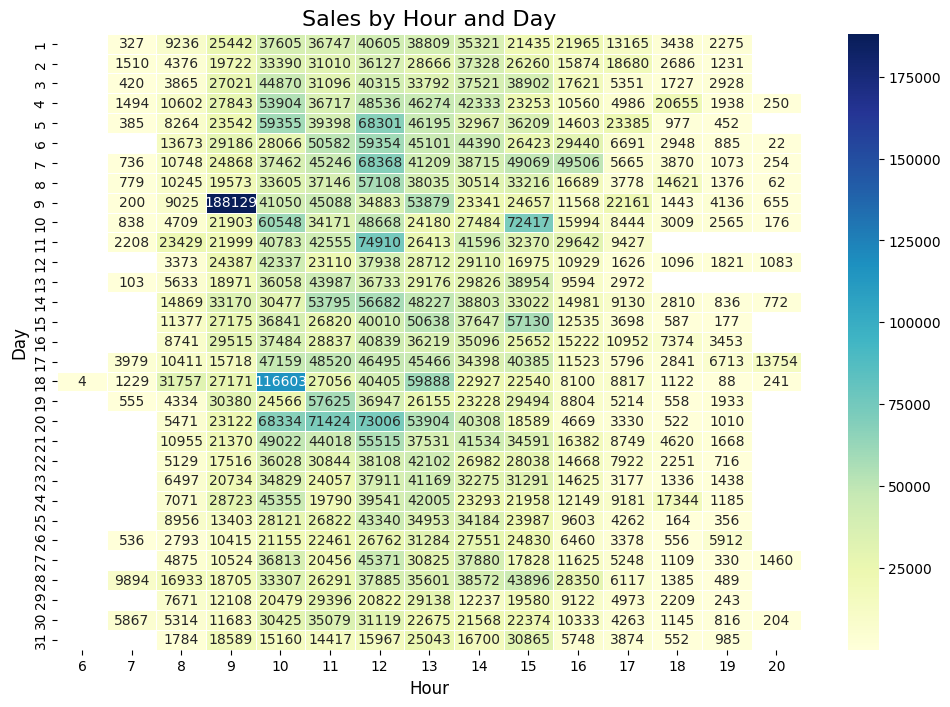

In [26]:
sales_heatmap = data.pivot_table(values="Revenue", index="Day", columns="Hour", aggfunc="sum")

plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Sales by Hour and Day", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Day", fontsize=12)
plt.show()

* It helps us to analyze the peak revenue period .The darkest boxes indicates this is the busiest period.
* This could be due to promotional activities, customer purchasing habits, or specific events happening on that day.
* Revenue values are generally higher during early hours.

<div style="background-color:#F5F5F5; padding:5px; border-radius:5px;">
    <h2 style="color:#011F4B;">Key Performance Indicators (KPIs)</h2>
<a id = 19 ></a>
</div>

### Total Revenue <a id = 20 ></a>

Total revenue represents the sum of all income generated from sales transactions. It provides an overview of the overall business performance within a specific period.

In [27]:
total_revenue = data["Revenue"].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $8,911,407.90


### Monthly Revenue Growth <a id = 21 ></a>

This KPI tracks the percentage increase or decrease in revenue compared to the previous month.

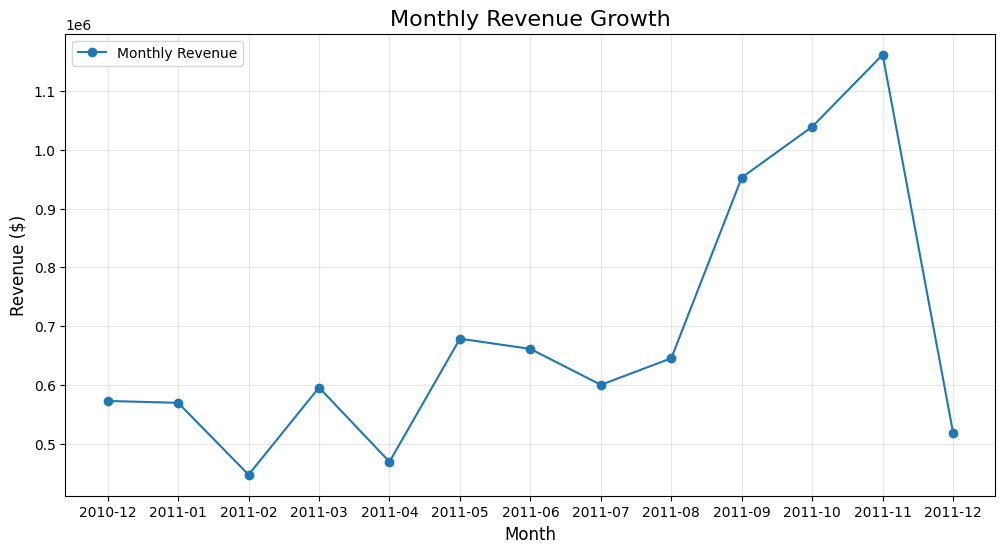

In [28]:
monthly_revenue = data.groupby(data["InvoiceDate"].dt.to_period("M"))["Revenue"].sum()
monthly_revenue_growth = monthly_revenue.pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker="o", label="Monthly Revenue")
plt.title("Monthly Revenue Growth", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### Best-Selling Products <a id = 22 ></a>

These are the products that generate the highest revenue.

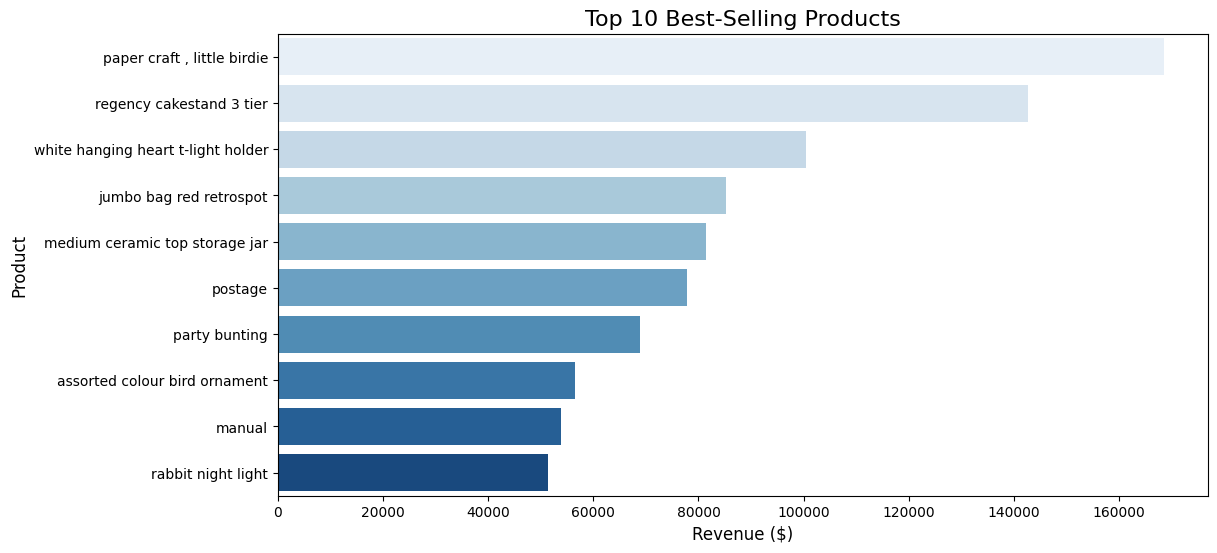

In [29]:
top_products = data.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette="Blues")
plt.title("Top 10 Best-Selling Products", fontsize=16)
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.show()

### Average Order Value (AOV) <a id = 23 ></a>

AOV is calculated as total revenue divided by the total number of orders. It is important to understand customer purchasing behavior and improve upselling or cross-selling strategies.

In [30]:
aov = data["Revenue"].sum() / data["InvoiceNo"].nunique()
print(f"Average Order Value (AOV): ${aov:,.2f}")

Average Order Value (AOV): $480.76


### Customer Lifetime Value (CLV) <a id = 24 ></a>

Customer Lifetime Value (CLV) is a metric that estimates the total revenue a customer will bring to a business over their lifetime. Below is an example of how to calculate and visualize CLV using a dataset with features like CustomerID, Quantity, and UnitPrice.

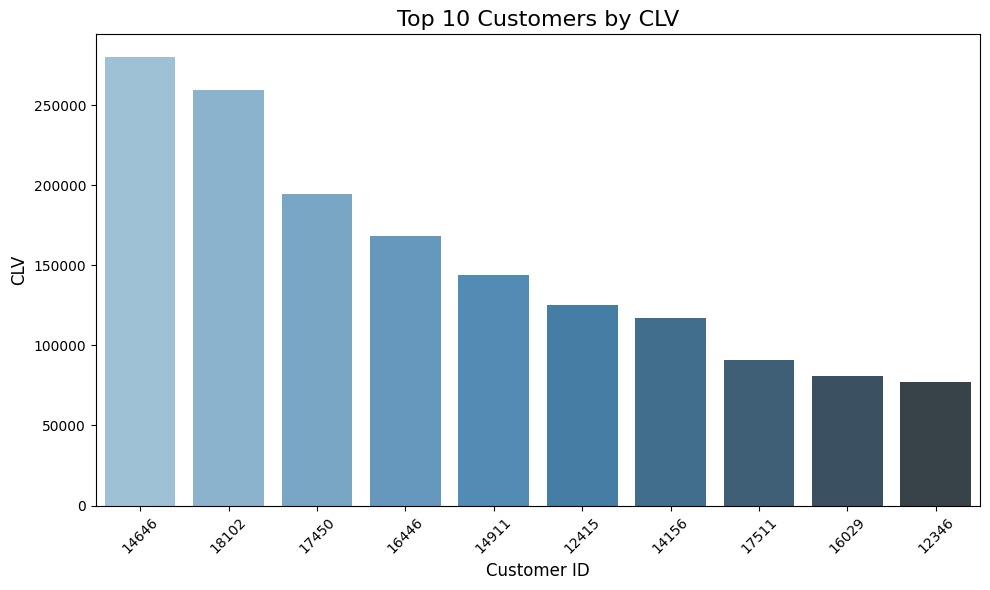

In [31]:
customer_clv = data.groupby("CustomerID").agg({
    "Revenue": "sum",       # Total revenue
    "InvoiceNo": "count"    # Number of transactions
}).rename(columns={"InvoiceNo": "Frequency"})

customer_clv["AOV"] = customer_clv["Revenue"] / customer_clv["Frequency"]
customer_clv["CLV"] = customer_clv["AOV"] * customer_clv["Frequency"]

customer_clv = customer_clv.sort_values(by='CLV', ascending=False)

top_10_customers = customer_clv.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_customers.index.astype(str), 
    y=top_10_customers["CLV"], 
    palette="Blues_d"
)
plt.title("Top 10 Customers by CLV", fontsize=16)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("CLV", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Summary**

This analysis serves as a foundation for data-driven decision-making, demonstrating the potential of e-commerce data to drive business growth. Future work can include predictive modeling, such as forecasting sales or customer segmentation using machine learning, to further enhance business insights.